<a href="https://colab.research.google.com/github/LeandroKobbi/Machine_Learning_MVP/blob/main/Machine_Learning_%26_Analytics_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução e Identificação dos Problemas

O futebol, como um dos esportes mais populares do mundo, é permeado por estatísticas que permitem uma compreensão aprofundada do desempenho de jogadores, equipes e ligas. Neste estudo, partimos da premissa de que a análise estatística pode revelar tendências significativas, especialmente no que diz respeito ao desempenho ofensivo dos jogadores. Hipotetizamos que as posições de meio-campista e atacante exercem um impacto mais substancial na quantidade de gols marcados, refletindo a natureza essencialmente ofensiva dessas funções.

Além disso, acreditamos que ligas de maior prestígio, como a Premier League, apresentarão um desempenho superior em termos de gols em comparação com ligas menos conhecidas. Com base nessas suposições, buscamos explorar a relação entre a performance dos jogadores e os contextos em que estão inseridos, como suas equipes e ligas.

Como entusiasta do esporte, tenho um interesse constante nas estatísticas do futebol e em como esses números influenciam a tomada de decisões. O projeto a seguir, fundamentado em técnicas de aprendizado supervisionado, e modelos de machine learning visa apresentar uma análise detalhada do desempenho de equipes e jogadores nas cinco principais ligas de futebol, adotando uma abordagem metódica para examinar as estatísticas disponíveis no conjunto de dados, além disso o trabalho propõe o uso de modelos clássicos de aprendizado de máquina para a resolução de um problema de classificação. No caso, optaremos por classificar jogadores de futebol com base em seus desempenhos, o que envolve várias etapas de pré-processamento, como a transformação dos dados, a separação entre treino e teste, a limpeza de dados ausentes e a coincidência de variações categóricas. Ao longo do código, são aplicados métodos de avaliação de modelos, como uma validação cruzada, e a análise dos resultados é realizada com o uso de gráficos.

O objetivo é identificar tanto as equipes e jogadores com desempenhos superiores quanto os que apresentam resultados inferiores, classificando-os de acordo com pontuações específicas. Adicionalmente, a análise incluirá um agrupamento de jogadores com perfis e desempenhos semelhantes, buscando descobrir talentos desconhecidos que possam oferecer alternativas valiosas aos nomes consagrados do futebol. Assim, pretende-se não apenas elucidar as dinâmicas do jogo, mas também fornecer insights práticos para analistas e gestores no universo do futebol.

# Importando bibliotecas

In [67]:
#importando a biblioteca do pandas
import pandas as pd
#importando biblioteca do matplotlob
import matplotlib.pyplot as plt
#importando biblioteca do numpy
import numpy as np
#importando biblioteca do seaborn
import seaborn as sns
#importando biblioteca do warnings
import warnings
warnings.filterwarnings("ignore")
#data set wine
from sklearn.datasets import load_wine
#separação de bases de treino e teste (holdout)
from sklearn.model_selection import train_test_split
#preparação dos folds da avaliação cruzada
from sklearn.model_selection import KFold
#execução da validação cruzada
from sklearn.model_selection import cross_val_score
#para exibição da acurácia do modelo
from sklearn.metrics import accuracy_score
#algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
#algoritmo árvore de classificação
from sklearn.tree import DecisionTreeClassifier
#algoritmo Naive Bayes
from sklearn.naive_bayes import GaussianNB
#algoritmo SVM
from sklearn.svm import SVC
#encoder
from sklearn.preprocessing import LabelEncoder
#simpleImputer
from sklearn.impute import SimpleImputer
#confusion_matrix
from sklearn.metrics import confusion_matrix

# Importando o Dataset

In [68]:
# URL do arquivo Excel
#Válida
url = 'https://github.com/LeandroKobbi/Machine_Learning_MVP/raw/main/top5-players.xlsx'

#inserindo váriavel para a tabela
df = pd.read_excel(url)

#verificando se é um dataframe
type(df)

pandas.core.frame.DataFrame

# Reconhecimento dos dados contidos no Dataset - Pré Processamento

In [69]:
#verificando a estrutura inicial dos dados
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [70]:
#verificando a estrutura final dos dados
df.tail()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26
2851,2852,Mateusz Łęgowski,pl POL,MF,Salernitana,it Serie A,20.0,2003.0,29,10,...,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.04,0.02,0.04


In [71]:
#exibindo as colunas
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [72]:
#quantidade de linhas por colunas para verificar tratamentos existentes
df.count()

,0
Rk,2852
Player,2852
Nation,2849
Pos,2852
Squad,2852
Comp,2852
Age,2848
Born,2848
MP,2852
Starts,2852


In [73]:
#eliminar linhas que contem todos os valores missing
df = df.dropna(how='any')
#eliminar linhas que contem todos os valores missing
df = df.dropna(how='all')

In [74]:
#informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2846 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2846 non-null   int64  
 1   Player       2846 non-null   object 
 2   Nation       2846 non-null   object 
 3   Pos          2846 non-null   object 
 4   Squad        2846 non-null   object 
 5   Comp         2846 non-null   object 
 6   Age          2846 non-null   float64
 7   Born         2846 non-null   float64
 8   MP           2846 non-null   int64  
 9   Starts       2846 non-null   int64  
 10  Min          2846 non-null   int64  
 11  90s          2846 non-null   float64
 12  Gls          2846 non-null   int64  
 13  Ast          2846 non-null   int64  
 14  G+A          2846 non-null   int64  
 15  G-PK         2846 non-null   int64  
 16  PK           2846 non-null   int64  
 17  PKatt        2846 non-null   int64  
 18  CrdY         2846 non-null   int64  
 19  CrdR       

In [75]:
#verificando o dataset
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


In [76]:
# Tratando as colunas das Ligas de futebol
df[['Comp_Country','Comp_Name']] = df["Comp"].str.split(" ", n=1, expand=True)
#Excluindo a coluna restante
df.drop(['Comp'], axis=1, inplace=True)

In [77]:
# Montando uma lista de renomeação de colunas
renomear_df = {'Rk': 'Índice',
               'Player':'Jogador',
               'Nation':'Nacionalidade',
               'Pos': 'Posição',
               'Squad': 'Time',
               'Comp_Name': 'Liga de Futebol',
               'Age': 'Idade',
               'Born': 'Nascimento',
               'MP': 'Minutos Jogados',
               'Starts':'Qtd. Partidas Iniciadas Jogando',
               'Min':'Minutos Jogados',
               '90s':'Partidas Completas Jogadas',
               'Gls':'Gols Marcados',
               'Ast':'Assistências',
               'G+A':'Gols + Assitências',
               'G-PK':'Gols - Pênaltis',
               'PK':'Gols Marcados por Pênaltis',
               'PKatt':'Pênaltis tentados pelo Jogador',
               'CrdY':'Cartões Amarelos',
               'CrdR':'Cartões Vermelhos',
               'xG':'Gols esperados',
               'npxG':'Gols esperados excluindo pênaltis',
               'xAG':'Assistências Esperadas',
               'npxG+xAG':'Total de Gols esperados sem Pênaltis e Assistências',
               'PrgC':'Carregando a bola para frente',
               'PrgP':'Passes Realizados p/ frente',
               'PrgR':'Passes Realizados p/ trás',
               'Gls_90':'Gols dentro de 90 min',
               'Ast_90':'Assistências dentro de 90 min',
               'G+A_90':'Gols + Assistências dentro de 90 min',
               'G-PK_90':'Gols - Pênaltis dentro de 90 min',
               'G+A-PK_90':'Gols + Assistências - Pênaltis dentro de 90 min',
               'xG_90':'Gols Esperados dentro de 90 min',
               'xAG_90':'Assistências Esperadas dentro de 90 min',
               'xG+xAG_90':'Gols + Assistências Esperadas dentro de 90 min',
               'npxG_90':'Gols esperados sem pênalti dentro de 90 min',
               'npxG+xAG_90':'Gols Esperados sem pênalti + assistências esperadas'}

# Renomeando as colunas do DataFrame
df = df.rename(columns=renomear_df)

# Excluir a coluna 'Comp_Country'
df = df.drop(columns=['Comp_Country'])

display(df.head())

,Índice,Jogador,Nacionalidade,Posição,Time,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,...,Assistências dentro de 90 min,Gols + Assistências dentro de 90 min,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas,Liga de Futebol
0,1,Max Aarons,eng ENG,DF,Bournemouth,23.0,2000.0,20,13,1237,...,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,Premier League
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,22.0,2000.0,30,14,1267,...,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Bundesliga
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,19.0,2003.0,7,1,101,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Bundesliga
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,17.0,2006.0,1,0,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Ligue 1
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,35.0,1987.0,31,31,2781,...,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,Ligue 1


In [78]:
#dimensões do dataset
df.shape

(2846, 37)

In [79]:
#Sumário estátistico
df.describe()

,Índice,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,Partidas Completas Jogadas,Gols Marcados,Assistências,Gols + Assitências,...,Gols dentro de 90 min,Assistências dentro de 90 min,Gols + Assistências dentro de 90 min,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas
count,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,...,2846.000000,2846.000000,2846.000000,2846.000000,2846.00000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000
mean,1425.466268,25.065706,1997.594870,19.004568,13.541110,1215.606817,13.507941,1.723823,1.224526,2.948349,...,0.122034,0.093493,0.215369,0.114382,0.20773,0.132551,0.099178,0.231831,0.124371,0.223710
std,823.836421,4.588237,4.593641,11.504151,11.248069,961.243136,10.681251,3.205933,1.966640,4.618653,...,0.284383,0.366599,0.473384,0.278045,0.46838,0.207943,0.236998,0.334870,0.198596,0.327874
min,1.000000,15.000000,1982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,712.250000,22.000000,1994.000000,8.000000,3.000000,298.500000,3.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.020000,0.010000,0.050000,0.020000,0.050000
50%,1424.500000,25.000000,1998.000000,20.000000,12.000000,1113.500000,12.400000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.090000,0.000000,0.09000,0.060000,0.060000,0.140000,0.060000,0.140000
75%,2139.750000,28.000000,2001.000000,29.000000,23.000000,1990.750000,22.100000,2.000000,2.000000,4.000000,...,0.150000,0.120000,0.290000,0.140000,0.28000,0.180000,0.130000,0.330000,0.170000,0.310000
max,2852.000000,40.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,36.000000,14.000000,44.000000,...,6.000000,11.250000,11.250000,6.000000,11.25000,4.550000,6.850000,6.850000,4.550000,6.850000


O sumário estatístico possibilita a realização de diversas análises que serão consideradas nos gráficos a seguir, abrangendo os seguintes aspectos:

Cartões amarelos e vermelhos
Minutos jogados
Quantidade de gols marcados
Assistências

Observamos também que o conjunto de dados apresenta uma escassez de estatísticas para jogadores de defesa, como, por exemplo, desarmes realizados e defesas efetuadas.

Portanto, procederemos à exclusão desses casos mais adiante, a fim de realizar uma avaliação mais precisa dos jogadores.

In [80]:
# Verificar os dados únicos em cada coluna
for coluna in df.columns:
    serie_coluna = df[coluna]
    print(f"Coluna: '{coluna}'")

    try:
        # Obter e exibir dados únicos
        dados_unicos = serie_coluna.unique()
        print(list(dados_unicos))
    except Exception as e:
        # Exibir erro, se ocorrer
        print(f"Erro ao processar a coluna '{coluna}': {e}")

Coluna: 'Índice'
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [81]:
# Dicionário de substituições
substituir_valores = {
    'DF': 'Defensor',
    'MF,FW': 'Meio-Campista e Atacante',
    'MF': 'Meio-Campista',
    'FW': 'Atacante',
    'FW,MF': 'Meio-Campista e Atacante',
    'DF,FW': 'Defensor e Atacante',
    'GK': 'Goleiro',
    'DF,MF': 'Defensor e Meio-Campista',
    'MF,DF': 'Defensor e Meio-Campista',
    'FW,DF': 'Defensor e Atacante'
}

# Substituir os valores na coluna 'Posição'
df['Posição'] = df['Posição'].replace(substituir_valores)

# Exibir os valores atualizados
print(df['Posição'].unique())

['Defensor' 'Meio-Campista e Atacante' 'Meio-Campista' 'Atacante'
 'Defensor e Atacante' 'Goleiro' 'Defensor e Meio-Campista']


Para facilitar a compreensão dos dados, foi realizado a converção das posição para os termos habitualmente utilizados no Brasil.

Adiante, cientes da presença de jogadores de defesa, procederemos à exclusão desses casos para garantir uma análise mais precisa.

In [82]:
# Lista de colunas que você deseja converter para int
colunas_para_int = ['Idade', 'Nascimento', 'Qtd. Partidas Iniciadas Jogando', 'Gols Marcados', 'Assistências',
                   'Gols + Assitências', 'Gols - Pênaltis', 'Gols Marcados por Pênaltis', 'Pênaltis tentados pelo Jogador',
                   'Cartões Amarelos', 'Cartões Vermelhos', 'Carregando a bola para frente', 'Passes Realizados p/ frente',
                   'Passes Realizados p/ trás']

# Verificar se todas as colunas estão no DataFrame
colunas_existentes = [col for col in colunas_para_int if col in df.columns]

# Converte valores para inteiros, substitui valores não numéricos por NaN e depois preenche NaN com 0
for col in colunas_existentes:
    # Verifique o tipo de dados da coluna para garantir que é uma Série
    if isinstance(df[col], pd.Series):
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    else:
        print(f"A coluna {col} não é uma Série e não pode ser convertida.")

# Exibindo as primeiras linhas do DataFrame para verificar se a conversão foi bem-sucedida
display(df.head())

,Índice,Jogador,Nacionalidade,Posição,Time,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,...,Assistências dentro de 90 min,Gols + Assistências dentro de 90 min,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas,Liga de Futebol
0,1,Max Aarons,eng ENG,Defensor,Bournemouth,23,2000,20,13,1237,...,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,Premier League
1,2,Brenden Aaronson,us USA,Meio-Campista e Atacante,Union Berlin,22,2000,30,14,1267,...,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Bundesliga
2,3,Paxten Aaronson,us USA,Meio-Campista,Eint Frankfurt,19,2003,7,1,101,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Bundesliga
3,4,Keyliane Abdallah,fr FRA,Atacante,Marseille,17,2006,1,0,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Ligue 1
4,5,Yunis Abdelhamid,ma MAR,Defensor,Reims,35,1987,31,31,2781,...,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,Ligue 1


# MACHINE LEARNING - PROBLEMA DE CLASSIFICAÇÃO

KNN: 0.493846 (0.027765)
CART: 0.931459 (0.010604)
NB: 0.529883 (0.036729)
SVM: 0.510105 (0.037853)


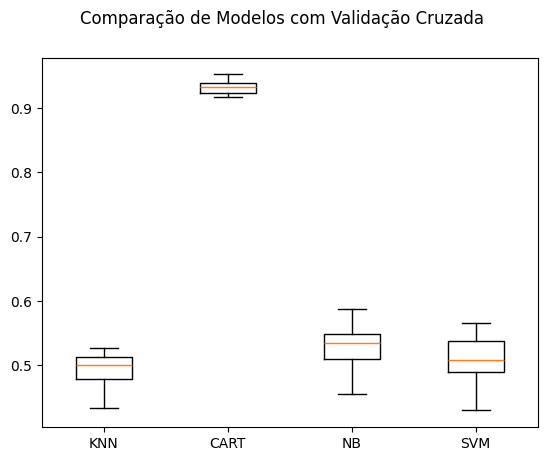

In [83]:
# Pré-processamento e tratamento de valores ausentes
# Remover linhas com valores ausentes
df = df.dropna(how='any')

# Codificar variáveis categóricas, caso necessário (ex: 'Gols Marcados')
label_encoder = LabelEncoder()

# Convertendo 'Gols Marcados' em números
df['Gols Marcados'] = label_encoder.fit_transform(df['Gols Marcados'])

# Variáveis independentes (X) e dependente (y)
X = df[['Idade', 'Minutos Jogados', 'Gols + Assistências dentro de 90 min', 'Assistências', 'Gols + Assitências', 'Cartões Amarelos', 'Cartões Vermelhos']]
y = df['Gols Marcados']  # A variável que queremos prever (classificação de Gols Marcados)

# Divisão dos dados em treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Criando folds para a validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

# --- Início do tratamento de valores ausentes ---
# Se houver valores ausentes (NaN), vamos usar o SimpleImputer para preenchê-los com a média
imputer = SimpleImputer(strategy='mean')

# Preenchendo valores ausentes nas variáveis de treino e teste
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
# --- Fim do tratamento de valores ausentes ---

# Modelagem e Avaliação
np.random.seed(10)

# Lista para armazenar modelos
models = []
resultados = []
nomes = []

# Preparando os modelos e adicionando à lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando os modelos
for name, model in models:
    # Usando validação cruzada com KFold e avaliando o modelo com a métrica 'accuracy' para modelos de classificação
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')  # Para modelos de classificação

    # Armazenando os resultados para análise posterior
    resultados.append(cv_results)
    nomes.append(name)

    # Exibindo a média e o desvio padrão dos resultados da validação cruzada
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Plotando o boxplot para comparar os resultados de todos os modelos
fig = plt.figure()
fig.suptitle('Comparação de Modelos com Validação Cruzada')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

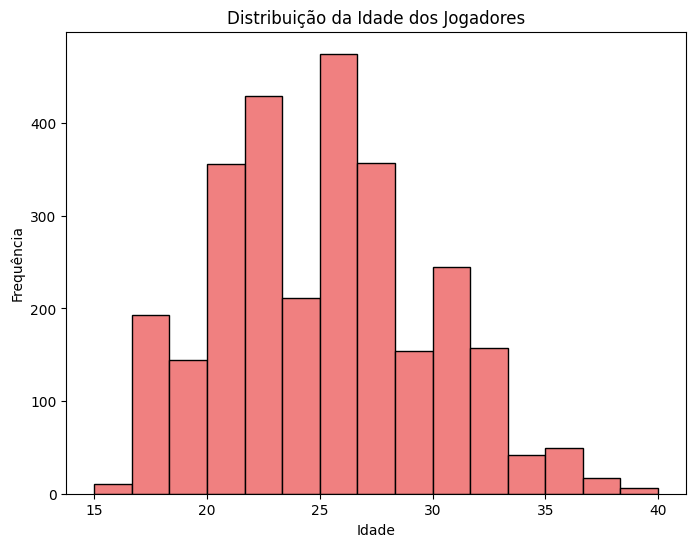

In [84]:
# Histograma para a variável 'Idade'
plt.figure(figsize=(8,6))
plt.hist(df['Idade'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Distribuição da Idade dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

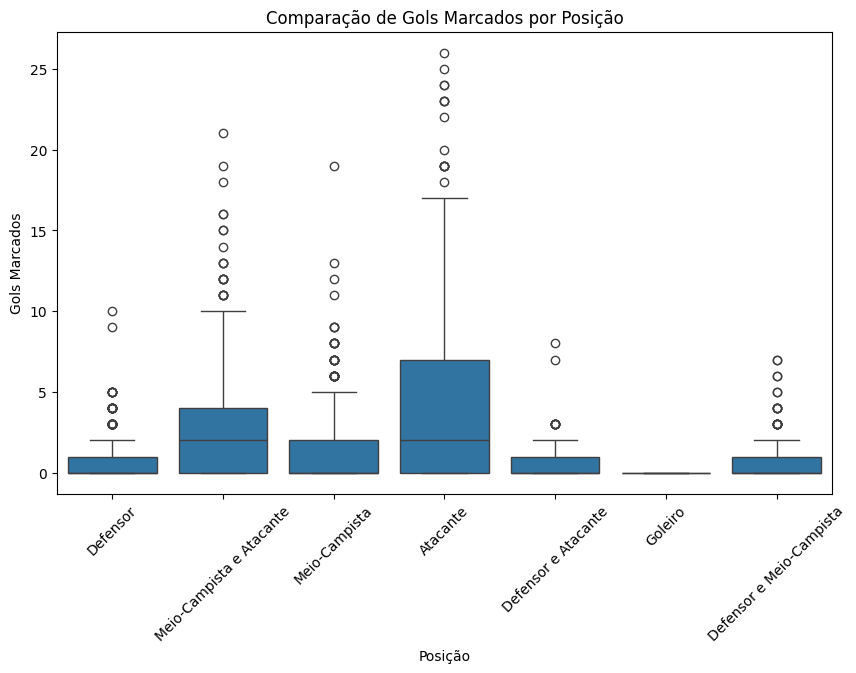

In [85]:
# Boxplot para comparar o desempenho de "Gols Marcados" por "Posição"
plt.figure(figsize=(10,6))
sns.boxplot(x='Posição', y='Gols Marcados', data=df)
plt.title('Comparação de Gols Marcados por Posição')
plt.xlabel('Posição')
plt.ylabel('Gols Marcados')
plt.xticks(rotation=45)
plt.show()

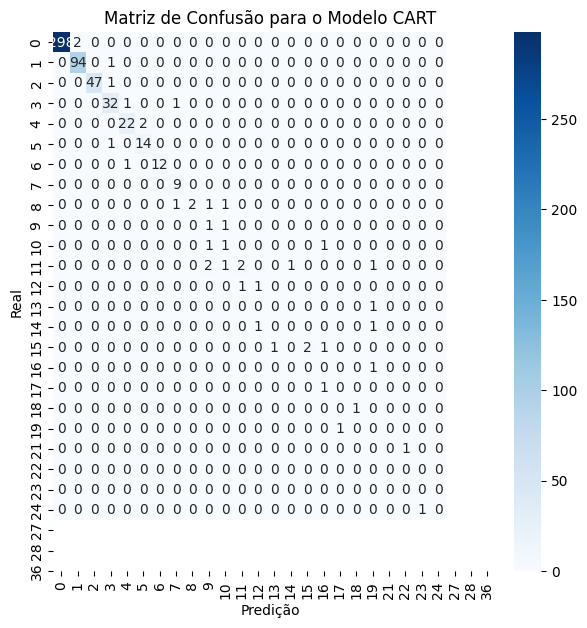

In [86]:
# Escolher o modelo CART (Decision Tree Classifier) para avaliação
model_cart = DecisionTreeClassifier(random_state=7)
model_cart.fit(x_train, y_train)
y_pred_cart = model_cart.predict(x_test)

# Gerando a matriz de confusão
cm_cart = confusion_matrix(y_test, y_pred_cart)

# Plotando a matriz de confusão com heatmap
plt.figure(figsize=(7,7))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão para o Modelo CART')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

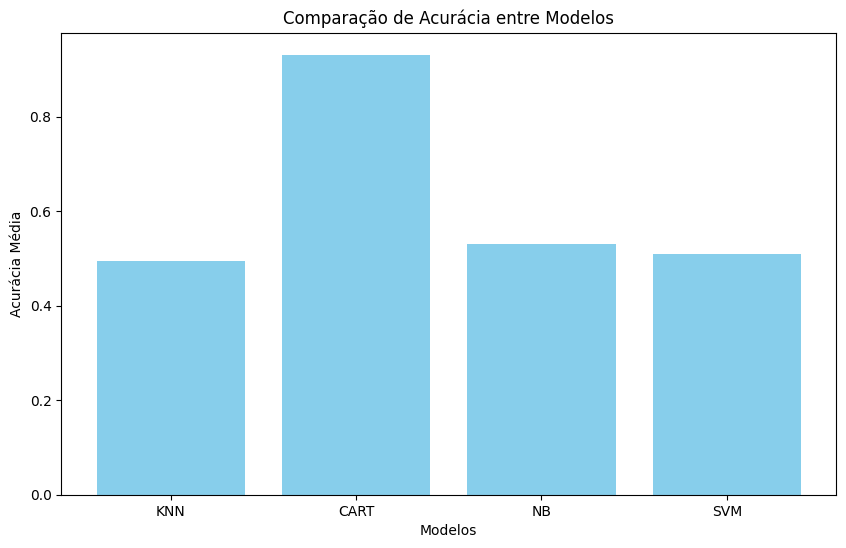

In [87]:
# Comparando a média da acurácia entre os modelos
mean_accuracies = [cv_results.mean() for cv_results in resultados]

# Criando gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(nomes, mean_accuracies, color='skyblue')
plt.title('Comparação de Acurácia entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Acurácia Média')
plt.show()

# KNN (K-Nearest Neighbors):

Acurácia média de ~49.38% com um desvio padrão de 0.0277. Isso indica que o modelo de KNN não está performando tão bem, com uma precisão média relativamente baixa.
O desvio padrão é baixo, o que indica que o modelo tem um desempenho estável, mas a acurácia geral não é muito alta.

# CART (Decision Tree Classifier):

Acurácia média de ~93.15% com um desvio padrão de 0.0106. Isso é muito bom! O modelo de árvore de decisão está mostrando uma precisão excelente e estável (com um desvio padrão muito baixo).
Isso indica que a árvore de decisão está se ajustando bem aos dados.

# Naive Bayes (NB):

Acurácia média de ~52.99% com um desvio padrão de 0.0367. Esse valor é um pouco mais alto que o KNN, mas ainda é uma precisão relativamente baixa.
O modelo de Naive Bayes está mais estável que o KNN, mas a performance geral não é tão boa quanto a da árvore de decisão.

# SVM (Support Vector Machine):

Acurácia média de ~51.01% com um desvio padrão de 0.0379. Esse desempenho também está em uma faixa semelhante ao KNN e ao Naive Bayes, com uma precisão moderada.
O modelo de SVM está também estável, mas não é o melhor em termos de acurácia média.

# Possíveis Considerações:
CART (Árvore de Decisão) está mostrando a melhor performance, com uma acurácia muito alta (~93%) e baixa variabilidade, o que indica que esse modelo se adapta muito bem aos dados.
KNN, Naive Bayes e SVM apresentam performances mais modestas, com KNN sendo o que apresenta o pior desempenho, seguido de SVM e Naive Bayes.

# O que pode ter influenciado esses resultados:

O dataset é relativamente pequeno, a árvore de decisão (CART) pode conseguir fazer um ajuste mais preciso aos dados. Por outro lado, KNN e SVM podem ser mais sensíveis a overfitting ou a dificuldade de aprender com dados complexos, especialmente se tratando de um dataset pequeno.

A performance inferior de KNN, SVM e Naive Bayes pode indicar que o padrão de dados não é ideal para esses modelos.

Se a árvore de decisão está realmente com desempenho superior e o restante dos modelos está mais ou menos equilibrado em termos de performance (KNN, Naive Bayes e SVM), levamos em consideração que não há erros evidentes.

Esses resultados parecem coerentes com a natureza dos modelos que estamos utilizando. A árvore de decisão (CART) está com a melhor performance, o que é esperado em muitos casos de classificação. No entanto, sempre vale a pena testar diferentes combinações de hiperparâmetros e explorar outras técnicas de pré-processamento de dados para tentar melhorar os resultados de KNN, SVM e Naive Bayes.

# Gráficos e Perguntas Relacionados aos Times e Ligas

A diferença entre a equipe que mais marcou gols e a equipe que menos marcou gols é de 391 gols


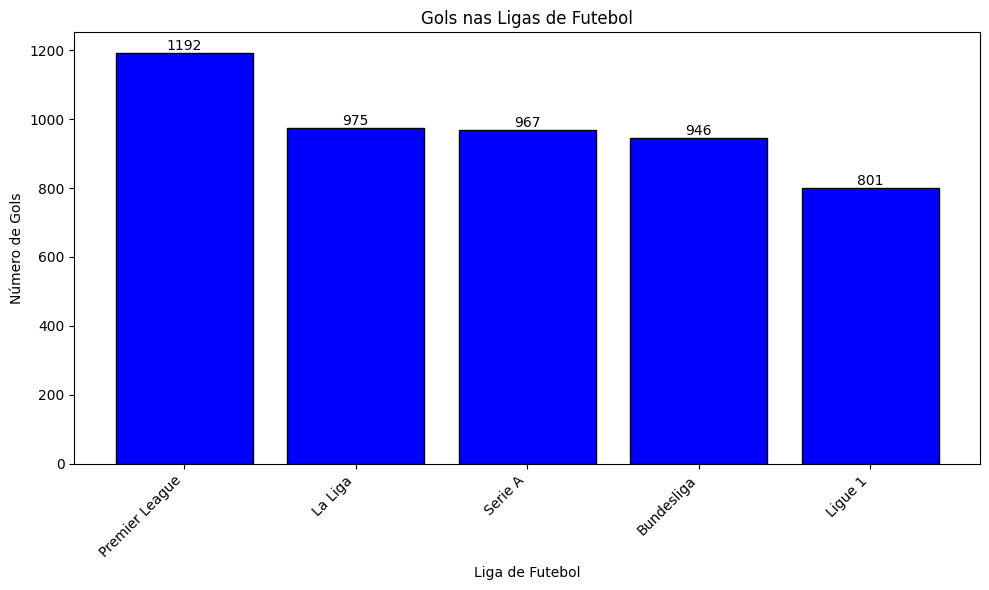

In [88]:
# Calculando a soma total de gols por liga
contagem_gols = df.groupby('Liga de Futebol')['Gols Marcados'].sum()

# Ordenando do maior para o menor
contagem_gols = contagem_gols.sort_values(ascending=False)

#verificando a diferença entre o primeiro e o último
dif = contagem_gols.max()-contagem_gols.min()

#printando a diferença entre o time que mais marcou gol para o time que menos marcou gol
print(f'A diferença entre a equipe que mais marcou gols e a equipe que menos marcou gols é de {dif} gols')

# Calculando a soma total de gols
gols = contagem_gols.sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(contagem_gols.index, contagem_gols, color='blue', edgecolor='black')

# Adicionando rótulos de dados em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, ha='right')

# Definindo o título do gráfico e rótulos dos eixos
plt.title('Gols nas Ligas de Futebol')
plt.xlabel('Liga de Futebol')
plt.ylabel('Número de Gols')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


Iniciaremos as análises do conjunto de dados examinando a quantidade de gols nas principais ligas de futebol em uma temporada completa.

As principais perguntas a serem respondidas são: quantos gols foram marcados em cada liga? Qual é a diferença entre a liga com o maior número de gols e a liga com o menor número de gols?

De acordo com as análises realizadas e ilustradas no gráfico, a Premier League registra 1.197 gols marcados, posicionando-se em primeiro lugar, enquanto a Ligue 1 contabiliza 804 gols marcados, ocupando a última posição entre as principais ligas de futebol analisadas.

A diferença entre a primeira e a última colocação, no que diz respeito ao tema "gols marcados", é de 393 gols.

Com base na análise acima, podemos concluir com razoável certeza que a Premier League inglesa se destaca como a melhor liga, ao menos sob a perspectiva ofensiva.

A diferença entre a equipe que mais marcou gols e a equipe que menos marcou gols é de 66 gols


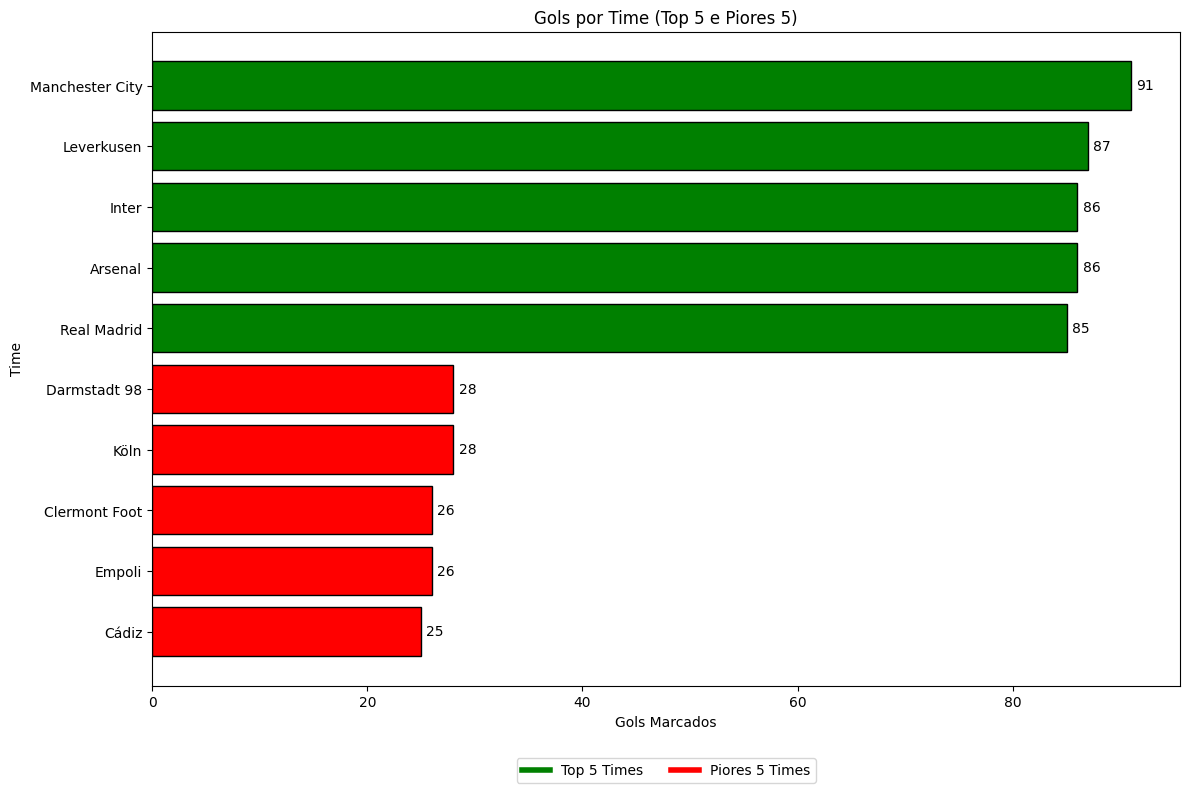

In [89]:
# Calculando a soma total de gols por time
contagem_gols_time = df.groupby('Time')['Gols Marcados'].sum()

# Ordenando do maior para o menor
contagem_gols_time = contagem_gols_time.sort_values(ascending=True)

#verificando a diferença entre o primeiro e o último
dif = contagem_gols_time.max()-contagem_gols_time.min()

print(f'A diferença entre a equipe que mais marcou gols e a equipe que menos marcou gols é de {dif} gols')

# Selecionando os 5 melhores e 5 piores times
top_5 = contagem_gols_time.head(5)
pior_5 = contagem_gols_time.tail(5)

# Concatenando os dados para o gráfico
dados_filtrados = pd.concat([top_5, pior_5])

# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))

# Definindo cores para os 5 melhores e os 5 piores
cores = ['red'] * len(top_5) + ['green'] * len(pior_5)
labels = ['Top 5 Times'] * len(top_5) + ['Piores 5 Times'] * len(pior_5)

bars = plt.barh(dados_filtrados.index, dados_filtrados, color=cores, edgecolor='black')

# Adicionando rótulos de dados no final das barras
for barh in bars:
    xval = barh.get_width()
    plt.text(xval + 0.5, barh.get_y() + barh.get_height()/2, round(xval, 2), va='center')

# Adicionando a legenda
# Criando handles para a legenda
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color='green', lw=4), Line2D([0], [0], color='red', lw=4)]

# Adicionando a legenda no centro embaixo do gráfico
plt.legend(legend_handles, ['Top 5 Times', 'Piores 5 Times'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Definindo o título do gráfico e rótulos dos eixos
plt.title('Gols por Time (Top 5 e Piores 5)')
plt.xlabel('Gols Marcados')
plt.ylabel('Time')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Aprofundando nossa análise, abordaremos as seguintes questões:

Agora que identificamos as ligas com o maior número de gols marcados, é hora de examinar as equipes.

Quais equipes registraram o maior e o menor número de gols marcados? Qual é a diferença entre elas?

Conforme ilustrado no gráfico, o Manchester City anotou 94 gols na temporada, em contraste com o Cádiz, que teve o pior desempenho ofensivo, com apenas 25 gols.

Isso resulta em uma diferença de 69 gols entre as duas equipes.

Com base na análise realizada, podemos concluir com razoável certeza que o Manchester City se destaca como a melhor equipe, ao menos sob a perspectiva ofensiva.

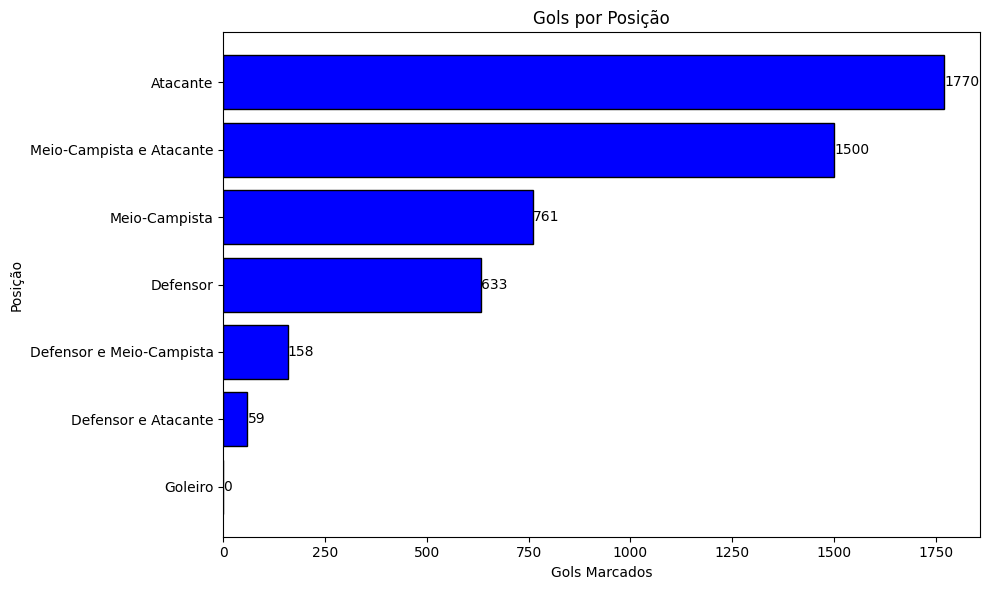

In [90]:
# Calculando a soma total de gols por posição
contagem_gols_posicao = df.groupby('Posição')['Gols Marcados'].sum()

# Ordenando do maior para o menor
contagem_gols_posicao = contagem_gols_posicao.sort_values(ascending=True)

# Calculando a soma total de gols
gols = contagem_gols_posicao.sum()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_gols_posicao.index, contagem_gols_posicao, color='blue', edgecolor='black')

# Adicionando rótulos de dados no final das barras
for barh in bars:
    xval = barh.get_width()
    plt.text(xval + 0.5, barh.get_y() + barh.get_height()/2, round(xval, 2), va='center')

# Definindo o título do gráfico e rótulos dos eixos
plt.title('Gols por Posição')
plt.xlabel('Gols Marcados')
plt.ylabel('Posição')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Pergunta: Qual posição registra o maior número de gols?

Conforme ilustrado no gráfico, os atacantes, ao serem somados, totalizam 1.794 gols marcados, seguidos pelos jogadores que atuam em duas posições (meio-campo e atacante), com 1.501 gols registrados.

Conforme já mencionado anteriormente e demonstrado no gráfico acima, observamos que os jogadores que atuam na defesa apresentam um número reduzido de gols marcados e são menos privilegiados no conjunto de dados devido à escassez de estatísticas disponíveis para esta posição.

# Parâmetros para avaliação dos Jogadores

In [91]:
#Para realizar a avaliação dos jogadores, seguiremos os seguintes parâmetros:

#1º Parâmetro:

#Como observado, o conjunto de dados carece de estatísticas que favoreçam os jogadores de defesa e os goleiros.
#As estatísticas estão mais voltadas para os jogadores que atuam no meio-campo e no ataque;
#portanto, consideraremos apenas as posições de meio-campista e atacante.

#2º Parâmetro:

#No sumário estatístico de partidas, o máximo de partidas jogadas por um jogador é de 38.
#A média é de 13 partidas. Assim, consideraremos apenas os jogadores que atuaram em 13 ou mais partidas.


#--------------------------------------------------------------------------------------------------------------------------

#enquadrando-se no 1° Parâmetro
df_av_jogadores = df.loc[(df['Posição'] == 'Atacante') | (df['Posição'] == 'Meio-Campista') | (df['Posição'] == 'Meio-Campista e Atacante')]

#enquadrando-se no 2° Parâmetro
df_av_jogadores = df_av_jogadores.loc[df_av_jogadores['Partidas Completas Jogadas'] >= 13]

#contando a quantidade de jogadores disponível para análise
qt_jogadores = df_av_jogadores['Jogador'].count()
print(f'A quantidade de jogadores disponíveis para essa análise é de {qt_jogadores} jogadores')


# Verificando as posições restantes no df
posições = df_av_jogadores['Posição'].unique()
print(f'As posições existente no dataset são {posições}')

df_av_jogadores.head()

A quantidade de jogadores disponíveis para essa análise é de 669 jogadores
As posições existente no dataset são ['Meio-Campista e Atacante' 'Meio-Campista' 'Atacante']


,Índice,Jogador,Nacionalidade,Posição,Time,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,...,Assistências dentro de 90 min,Gols + Assistências dentro de 90 min,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas,Liga de Futebol
1,2,Brenden Aaronson,us USA,Meio-Campista e Atacante,Union Berlin,22,2000,30,14,1267,...,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Bundesliga
5,6,Salis Abdul Samed,gh GHA,Meio-Campista,Lens,23,2000,27,17,1519,...,0.00,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08,Ligue 1
7,8,Laurent Abergel,fr FRA,Meio-Campista,Lorient,30,1993,33,32,2860,...,0.03,0.09,0.06,0.09,0.04,0.07,0.10,0.04,0.10,Ligue 1
18,19,Akor Adams,ng NGA,Atacante,Montpellier,23,2000,32,27,2252,...,0.04,0.36,0.32,0.36,0.50,0.07,0.57,0.50,0.57,Ligue 1
23,24,Elijah Adebayo,eng ENG,Atacante,Luton Town,25,1998,27,16,1419,...,0.00,0.63,0.63,0.63,0.37,0.04,0.42,0.37,0.42,Premier League


In [92]:
#Sumário estátistico
#Verificar mais parâmetros para pontuação dos jogadores
df_av_jogadores.describe()

,Índice,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,Partidas Completas Jogadas,Gols Marcados,Assistências,Gols + Assitências,...,Gols dentro de 90 min,Assistências dentro de 90 min,Gols + Assistências dentro de 90 min,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas
count,669.000000,669.000000,669.00000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,...,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,1466.439462,25.627803,1997.03438,29.949178,23.146487,2011.843049,22.355755,4.946188,3.037369,8.020927,...,0.218176,0.134006,0.352048,0.194439,0.328326,0.216188,0.132451,0.348685,0.192735,0.325501
std,817.666970,3.978671,4.01237,4.796810,6.778096,548.430347,6.093104,4.771432,2.649163,6.540947,...,0.195234,0.110626,0.253969,0.175496,0.234379,0.170150,0.088007,0.215163,0.147575,0.193774
min,2.000000,16.000000,1985.00000,15.000000,8.000000,1167.000000,13.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000
25%,798.000000,22.000000,1994.00000,27.000000,17.000000,1538.000000,17.100000,1.000000,1.000000,3.000000,...,0.070000,0.050000,0.150000,0.060000,0.150000,0.080000,0.070000,0.170000,0.080000,0.160000
50%,1482.000000,25.000000,1997.00000,31.000000,23.000000,1972.000000,21.900000,4.000000,2.000000,6.000000,...,0.170000,0.110000,0.300000,0.150000,0.290000,0.180000,0.120000,0.320000,0.160000,0.300000
75%,2182.000000,28.000000,2000.00000,33.000000,29.000000,2476.000000,27.500000,7.000000,4.000000,11.000000,...,0.310000,0.200000,0.490000,0.280000,0.450000,0.310000,0.180000,0.490000,0.270000,0.440000
max,2851.000000,37.000000,2007.00000,38.000000,38.000000,3325.000000,36.900000,26.000000,14.000000,44.000000,...,1.140000,0.740000,1.420000,0.980000,1.240000,1.030000,0.850000,1.180000,0.850000,1.050000


In [93]:
#Mais parâmetros estabelecidos

# Cada gol vale 8 pontos
# Cada assistência vale 5 pontos
# A cada cartão Amarelo recebido jogador recebe -2 pontos
# A cada vermelho recebido o jogador recebe -5 pontos


df_av_jogadores['Pontuação'] = (df_av_jogadores['Gols Marcados'] * 8) + (df_av_jogadores['Assistências'] * 5) - (df_av_jogadores['Cartões Amarelos'] * 2) - (df_av_jogadores['Cartões Vermelhos'] * 5)

display(df_av_jogadores)

,Índice,Jogador,Nacionalidade,Posição,Time,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,...,Gols + Assistências dentro de 90 min,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas,Liga de Futebol,Pontuação
1,2,Brenden Aaronson,us USA,Meio-Campista e Atacante,Union Berlin,22,2000,30,14,1267,...,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Bundesliga,15
5,6,Salis Abdul Samed,gh GHA,Meio-Campista,Lens,23,2000,27,17,1519,...,0.00,0.00,0.00,0.05,0.03,0.08,0.05,0.08,Ligue 1,-4
7,8,Laurent Abergel,fr FRA,Meio-Campista,Lorient,30,1993,33,32,2860,...,0.09,0.06,0.09,0.04,0.07,0.10,0.04,0.10,Ligue 1,13
18,19,Akor Adams,ng NGA,Atacante,Montpellier,23,2000,32,27,2252,...,0.36,0.32,0.36,0.50,0.07,0.57,0.50,0.57,Ligue 1,65
23,24,Elijah Adebayo,eng ENG,Atacante,Luton Town,25,1998,27,16,1419,...,0.63,0.63,0.63,0.37,0.04,0.42,0.37,0.42,Premier League,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,2839,Joshua Zirkzee,nl NED,Atacante,Bologna,22,2001,34,32,2759,...,0.49,0.29,0.42,0.29,0.17,0.46,0.24,0.41,Serie A,92
2845,2846,Martín Zubimendi,es ESP,Meio-Campista,Real Sociedad,24,1999,31,29,2654,...,0.17,0.14,0.17,0.09,0.05,0.14,0.09,0.14,La Liga,27
2848,2849,Martin Ødegaard,no NOR,Meio-Campista,Arsenal,24,1998,35,35,3091,...,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45,Premier League,110
2849,2850,Milan Đurić,ba BIH,Atacante,Hellas Verona,33,1990,20,13,1204,...,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25,Serie A,41


Nesta etapa, iniciaremos a definição de determinados parâmetros e pontuações para os jogadores filtrados. O objetivo é realizar uma análise que permita classificar os jogadores em faixas específicas, além de estabelecer correlações entre jogadores, ligas e times.

In [94]:
#Verificar mais parâmetros para pontuação dos jogadores
df_av_jogadores['Pontuação'].describe()

,Pontuação
count,669.000000
mean,45.050822
std,46.811002
min,-30.000000
25%,11.000000
50%,35.000000
75%,67.000000
max,244.000000


Embora a média de pontuação seja 45 e o valor máximo atinja 324, não excluiremos os casos extremos, pois isso nos permitirá realizar classificações mais adiante, destacando tanto os melhores quanto os piores atletas.

In [95]:
#Criação dos parâmetros para classificar jogadores em escalas:

#- Ruim = Pontuação < 0
#- Regular = Pontuação >= 0  e < 45
#- Bom = Pontuação >= 45  e < 90
#- Muito Bom = Pontuação >= 90  e < 180
#- Estrela = Pontuação >= 180

def classificacao(valor):
    if valor < 0:
        return 'Ruim'
    elif valor >= 0 and valor < 45:
        return 'Regular'
    elif valor >= 45 and valor < 90:
        return 'Bom'
    elif valor >= 90 and valor <180:
        return 'Muito Bom'
    elif valor >=180:
        return 'Estrela'
    else:
        return 'Fora de Parâmetros'

# Criando a nova coluna com os valores mapeados
df_av_jogadores['Classificação'] = df_av_jogadores['Pontuação'].apply(classificacao)

display(df_av_jogadores)

,Índice,Jogador,Nacionalidade,Posição,Time,Idade,Nascimento,Minutos Jogados,Qtd. Partidas Iniciadas Jogando,Minutos Jogados,...,Gols - Pênaltis dentro de 90 min,Gols + Assistências - Pênaltis dentro de 90 min,Gols Esperados dentro de 90 min,Assistências Esperadas dentro de 90 min,Gols + Assistências Esperadas dentro de 90 min,Gols esperados sem pênalti dentro de 90 min,Gols Esperados sem pênalti + assistências esperadas,Liga de Futebol,Pontuação,Classificação
1,2,Brenden Aaronson,us USA,Meio-Campista e Atacante,Union Berlin,22,2000,30,14,1267,...,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Bundesliga,15,Regular
5,6,Salis Abdul Samed,gh GHA,Meio-Campista,Lens,23,2000,27,17,1519,...,0.00,0.00,0.05,0.03,0.08,0.05,0.08,Ligue 1,-4,Ruim
7,8,Laurent Abergel,fr FRA,Meio-Campista,Lorient,30,1993,33,32,2860,...,0.06,0.09,0.04,0.07,0.10,0.04,0.10,Ligue 1,13,Regular
18,19,Akor Adams,ng NGA,Atacante,Montpellier,23,2000,32,27,2252,...,0.32,0.36,0.50,0.07,0.57,0.50,0.57,Ligue 1,65,Bom
23,24,Elijah Adebayo,eng ENG,Atacante,Luton Town,25,1998,27,16,1419,...,0.63,0.63,0.37,0.04,0.42,0.37,0.42,Premier League,78,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,2839,Joshua Zirkzee,nl NED,Atacante,Bologna,22,2001,34,32,2759,...,0.29,0.42,0.29,0.17,0.46,0.24,0.41,Serie A,92,Muito Bom
2845,2846,Martín Zubimendi,es ESP,Meio-Campista,Real Sociedad,24,1999,31,29,2654,...,0.14,0.17,0.09,0.05,0.14,0.09,0.14,La Liga,27,Regular
2848,2849,Martin Ødegaard,no NOR,Meio-Campista,Arsenal,24,1998,35,35,3091,...,0.17,0.47,0.22,0.28,0.50,0.17,0.45,Premier League,110,Muito Bom
2849,2850,Milan Đurić,ba BIH,Atacante,Hellas Verona,33,1990,20,13,1204,...,0.30,0.37,0.34,0.09,0.43,0.16,0.25,Serie A,41,Regular


No DataFrame filtrado e dentro dos parâmetros estabelecidos, já é possível realizar análises gráficas para observar como esses jogadores estão inseridos nos contextos destacados.

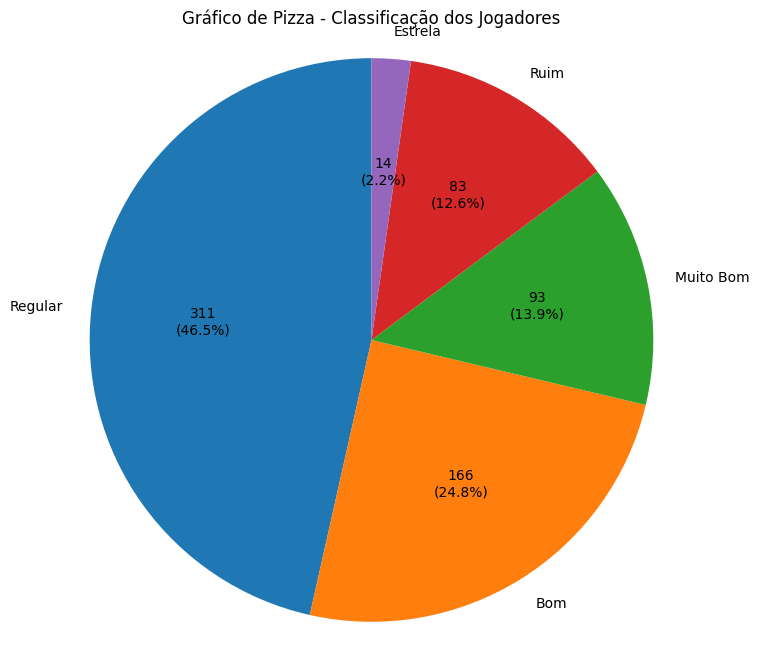

In [96]:
# Contar a quantidade de jogadores por classificação
contagem = df_av_jogadores['Classificação'].value_counts()

# Criar uma função para formatar os rótulos
def func(pct, allvalues):
    # Cálculo do valor absoluto
    absolute = int(pct / 100. * sum(allvalues))
    # Formato: valor absoluto e percentual
    return f"{absolute}\n({pct:.1f}%)"

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem, labels=contagem.index, autopct=lambda pct: func(pct, contagem), startangle=90)
plt.title('Gráfico de Pizza - Classificação dos Jogadores')
plt.axis('equal')  # Para manter o gráfico como um círculo
plt.show()

A soma dos jogadores classificados como regulares e ruins corresponde a 59,1% do total de atletas nesta liga.
Em contrapartida, os jogadores estrelas representam apenas 2,2% do total de jogadores que atuam nessa liga.

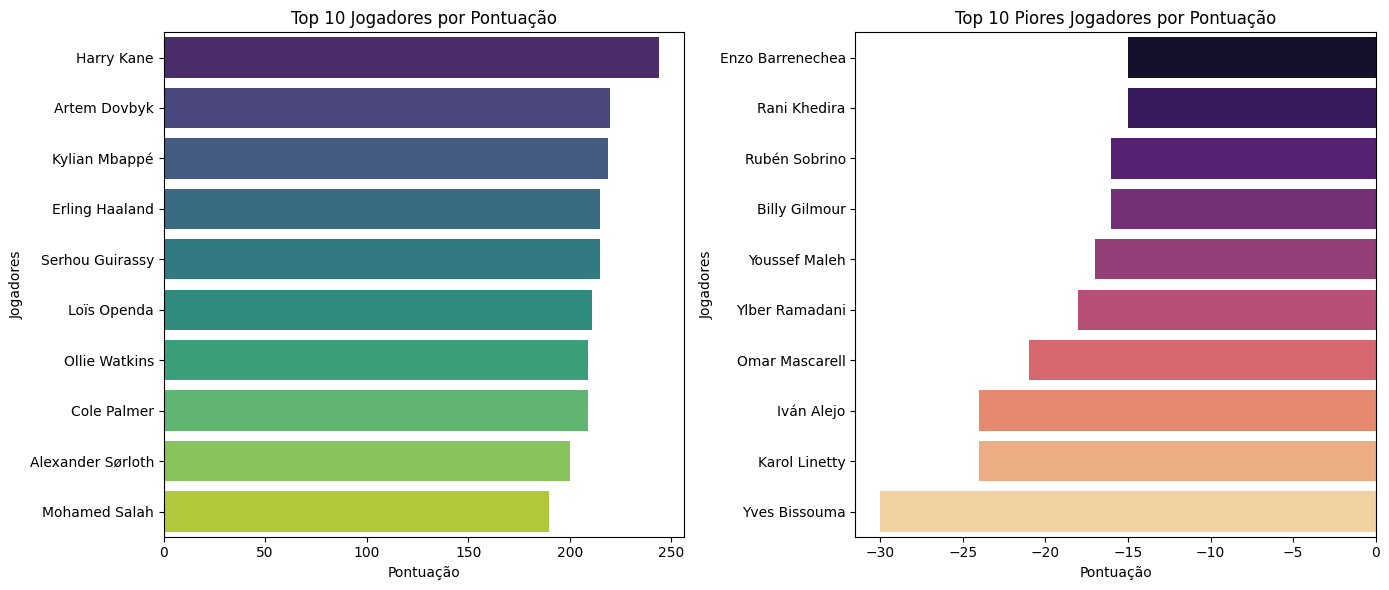

In [97]:
# Ordenar o DataFrame pelo ranking (pontuação) em ordem decrescente
df_av_jogadores = df_av_jogadores.sort_values(by='Pontuação', ascending=False)

# Obter os 10 melhores e os 10 piores jogadores
top_10 = df_av_jogadores.head(10)
bottom_10 = df_av_jogadores.tail(10)

# Criar gráficos de barras horizontais
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico dos 10 melhores
sns.barplot(data=top_10, x='Pontuação', y='Jogador', ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Jogadores por Pontuação')
axes[0].set_xlabel('Pontuação')
axes[0].set_ylabel('Jogadores')

# Gráfico dos 10 piores
sns.barplot(data=bottom_10, x='Pontuação', y='Jogador', ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Piores Jogadores por Pontuação')
axes[1].set_xlabel('Pontuação')
axes[1].set_ylabel('Jogadores')

# Ajustar layout
plt.tight_layout()
plt.show()

   Classificação Liga de Futebol  Quantidade
0            Bom      Bundesliga          25
1            Bom         La Liga          29
2            Bom         Ligue 1          31
3            Bom  Premier League          53
4            Bom         Serie A          28
5        Estrela      Bundesliga           4
6        Estrela         La Liga           3
7        Estrela         Ligue 1           1
8        Estrela  Premier League           6
9        Estrela         Serie A           1
10     Muito Bom      Bundesliga          20
11     Muito Bom         La Liga          19
12     Muito Bom         Ligue 1          11
13     Muito Bom  Premier League          23
14     Muito Bom         Serie A          20
15       Regular      Bundesliga          57
16       Regular         La Liga          69
17       Regular         Ligue 1          67
18       Regular  Premier League          53
19       Regular         Serie A          65
20          Ruim      Bundesliga          10
21        

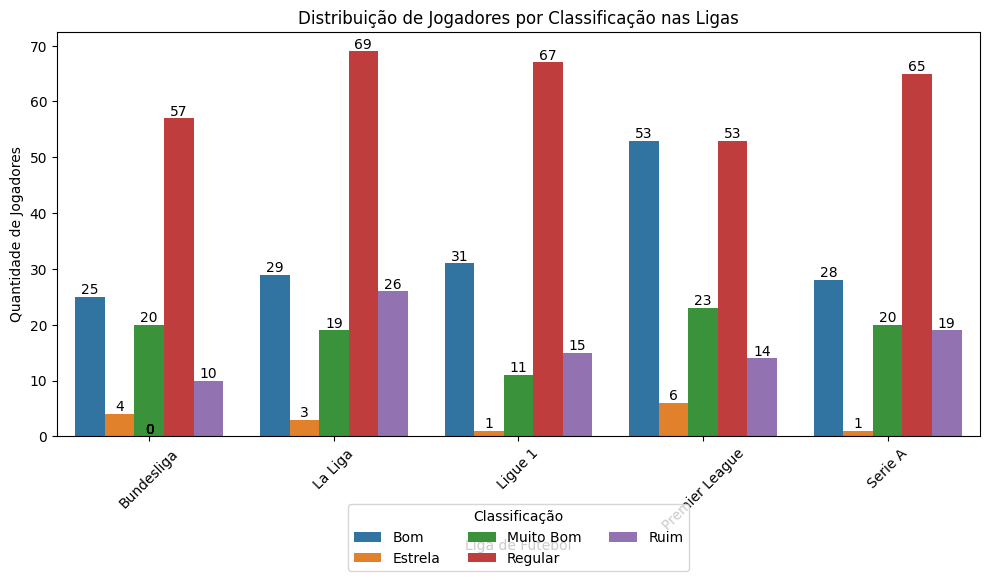

In [98]:
# Contar a quantidade de jogadores por Classificação e Liga
contagem = df_av_jogadores.groupby(['Classificação', 'Liga de Futebol']).size().reset_index(name='Quantidade')

# Exibir resultados
print(contagem)

# Exemplo de visualização: Gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=contagem, x='Liga de Futebol', y='Quantidade', hue='Classificação')
plt.title('Distribuição de Jogadores por Classificação nas Ligas')
plt.xlabel('Liga de Futebol')
plt.ylabel('Quantidade de Jogadores')
plt.xticks(rotation=45)

# Adicionar rótulos de dados
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10)

# Adicionar legenda abaixo do gráfico
plt.legend(title='Classificação', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


plt.show()

É pertinente destacar alguns aspectos da Premier League:

-- A liga apresenta a maior quantidade de jogadores classificados como estrelas.
-- É a liga com o maior número de gols registrados.
-- Observa-se uma quantidade reduzida de jogadores classificados como regulares.
-- A distribuição dos jogadores classificados como muito bom e bom é significativamente mais elevada na Premier League.

Por outro lado, a Ligue 1 apresenta características distintas:

-- Esta liga possui a menor quantidade de jogadores estrelas, similar à Série A.
-- O maior contingente de jogadores nessa liga é composto por jogadores regulares.
-- A soma das categorias de jogadores estrelas, bom e muito bom não atinge o total de jogadores regulares.

Outro fator surpreendente é a La Liga:

-- Apesar de ser a liga com a segunda maior quantidade de gols, temos bastantes jogadores regulares e ruis

# Conclusão
A análise realizada ao longo deste estudo possibilitou uma compreensão aprofundada do desempenho dos jogadores nas principais ligas de futebol. Ao filtrar os dados e focar nas posições de meio-campista e atacante, conseguimos destacar as estatísticas mais relevantes e identificar os jogadores com melhor e pior desempenho. Através das análises gráficas, ficou evidente a predominância dos atacantes na marcação de gols, assim como as diferenças significativas entre as ligas e equipes.

Os parâmetros estabelecidos permitiram uma avaliação justa e consistente, mantendo os casos extremos para análises futuras. Assim, nossas conclusões oferecem insights valiosos sobre a dinâmica das ligas, equipes e jogadores, contribuindo para uma compreensão mais abrangente do cenário atual do futebol.

Com base nas informações coletadas, podemos afirmar que a Premier League se destaca como a liga mais ofensiva, enquanto o Manchester City se posiciona como uma das equipes de maior destaque. Essas observações não apenas enriquecem a análise estatística, mas também fornecem uma base sólida para futuras investigações no campo.

Após a execução dos modelos de machine learning também, foi possível avaliar o desempenho de cada um utilizando validação cruzada.

O modelo CART apresentou o melhor desempenho em termos de acurácia, superando os demais modelos avaliados.

A análise exploratória também revelou que jogadores com mais gols marcados têm maior probabilidade de se classificar como 'Muito Bom',
enquanto jogadores com menos gols ou assistências ficaram em classificações inferiores. A comparação entre as ligas mostrou que
as ligas com mais gols tendem a ter uma maior quantidade de jogadores 'Muito Bom'.

Este trabalho demonstrou a aplicabilidade de técnicas de machine learning na análise de desempenho de jogadores de futebol,
fornecendo insights valiosos para a avaliação de atletas.
